<a href="https://colab.research.google.com/github/radhikark0707/my-data-analysis/blob/main/KMeans_Agglomerative_Hierarchical__Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KMeans

In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('/content/fish.csv',header=None)

In [3]:
data.head()

,0,1,2,3,4,5,6
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1


In [4]:
col_names=['Type','weight','l1','l2','l3','height','width']

In [5]:
data.columns=col_names
data.head()

,Type,weight,l1,l2,l3,height,width
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1


In [6]:
x=data[['weight','l1']]

In [7]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [8]:
sse=[]
from sklearn.cluster import KMeans
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,n_init=10,random_state=42)
  kmeans.fit(x_scaled)
  sse.append(kmeans.inertia_)

In [9]:
sse

[170.00000000000003,
 69.02965613245425,
 32.74922809694057,
 21.103502284748163,
 15.144925304931,
 10.46638336340721,
 7.154350666611198,
 5.652397630377411,
 4.358599772447492,
 3.179172077921729]

In [10]:
import matplotlib.pyplot as plt

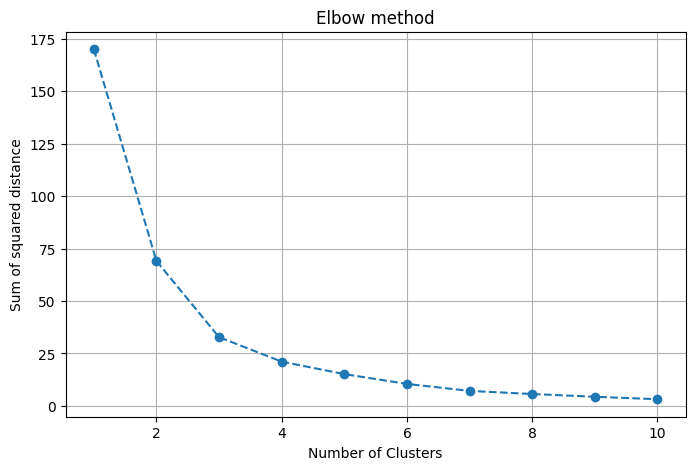

In [11]:
plt.figure(figsize=(8,5))
plt.plot(range(1,11),sse,marker='o',linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of squared distance')
plt.title('Elbow method')
plt.grid()
plt.show()

In [12]:
kmeans=KMeans(n_clusters=4,n_init=10,random_state=42)
kmeans.fit(x_scaled)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [13]:
cluster_labels=kmeans.predict(x_scaled)

In [14]:
data['cluster_kmeans']=cluster_labels

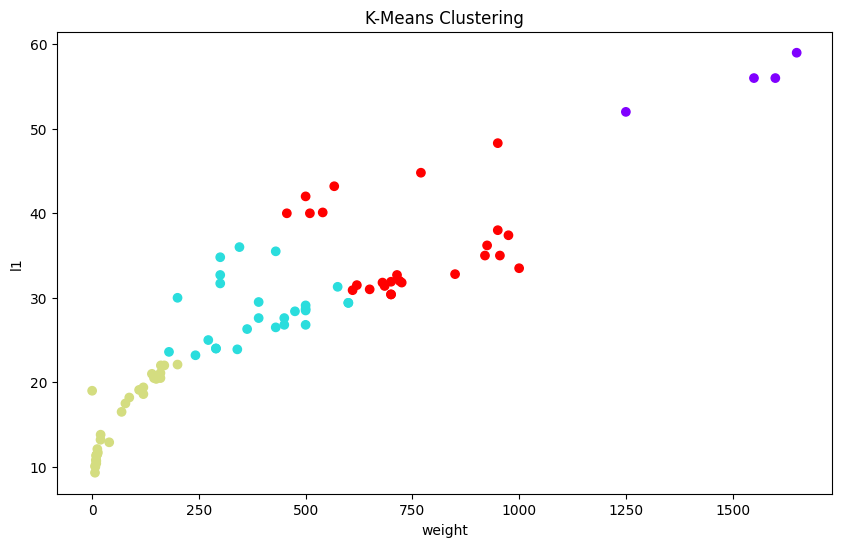

In [16]:
plt.figure(figsize=(10,6))
plt.scatter(x['weight'],x['l1'],c=data['cluster_kmeans'],cmap='rainbow')
plt.xlabel('weight')
plt.ylabel('l1')
plt.title('K-Means Clustering')
plt.show()

Agglomerative Hierarchical Clustering


In [17]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import fcluster

In [18]:
mergings=linkage(x_scaled,method='ward')

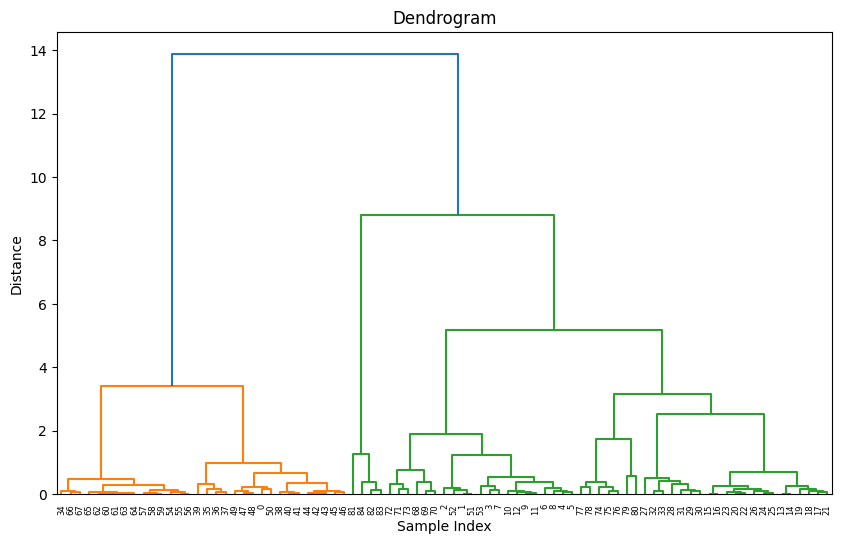

In [19]:
plt.figure(figsize=(10,6))
dendrogram(mergings)
plt.axhline(y=350,color='r',linestyle='--')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.show()

In [ ]:
cluster_labels=fcluster(mergings,350,criterion='distance')

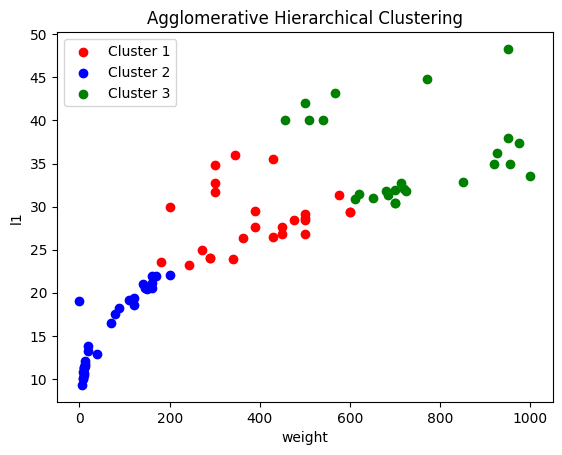

In [20]:
colors=['red','blue','green']
for i in range(1,max(cluster_labels)+1):
  cluster_data=x[cluster_labels==i]
  plt.scatter(cluster_data['weight'],cluster_data['l1'],c=colors[i-1],label=f'Cluster {i}')
plt.xlabel('weight')
plt.ylabel('l1')
plt.title('Agglomerative Hierarchical Clustering')
plt.legend()
plt.show()

In [21]:
from sklearn.metrics import silhouette_score
sil_avg=silhouette_score(x_scaled,cluster_labels)
print('Silhouette Average Score:',sil_avg)


Silhouette Average Score: 0.478259197720128
